In [1]:
import pandas as pd
import gc
import numpy as np

df = pd.read_csv("sell-in.txt", sep="\t")
df = df.groupby(by=["periodo","product_id"]).agg({"tn":"sum"}).reset_index()
df["periodo"] = pd.to_datetime(df["periodo"], format="%Y%m")
df_pivot = df.pivot(index="periodo", columns="product_id", values="tn").reset_index()

magicos = [ "periodo",20002, 20003, 20006, 20010, 20011, 20018, 20019, 20021,
   20026, 20028, 20035, 20039, 20042, 20044, 20045, 20046,  20049,
   20051, 20052, 20053, 20055, 20008, 20001, 20017, 20086, 20180,
   20193, 20320, 20532, 20612, 20637, 20807, 20838
 ]
X_train = df_pivot[magicos].query("periodo >= '2018-01-01' & periodo <= '2018-12-31' ")
X_train = X_train.T.iloc[1:]
X_train.columns = [f"t-{11-k}" for k in range(12)]


X_kgl = df_pivot.query("periodo >= '2019-01-01' & periodo <= '2019-12-31'")
X_kgl = X_kgl.T.iloc[1:]
X_kgl.columns = [f"t-{11-k}" for k in range(12)]
promedio = X_kgl.mean(axis=1)
promedio = promedio.fillna(0)


y = df_pivot[magicos].query("periodo == '2019-02-01'").T.iloc[1:]
y.columns = ["target"]


C:\Users\waldo\AppData\Local\Temp\ipykernel_1456\1083521902.py:24: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  promedio = promedio.fillna(0)
C:\Users\waldo\AppData\Local\Temp\ipykernel_1456\1083521902.py:27: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  y = df_pivot[magicos].query("periodo == '2019-02-01'").T.iloc[1:]


In [2]:
y

,target
product_id,
20002,1043.01349
20003,758.32657
20006,479.99914
20010,337.76009
20011,431.62938
20018,265.84135
20019,323.66178
20021,219.88515
20026,263.67957


In [3]:
promedio

product_id
20001    1454.732720
20002    1175.437142
20003     784.976407
20004     627.215328
20005     668.270104
            ...     
21295       0.000000
21296       0.000000
21297       0.000000
21298       0.000000
21299       0.000000
Length: 1233, dtype: float64

In [4]:
prod_menos12 = X_kgl.index[X_kgl.isna().sum(axis=1)> 0]
X_kgl = X_kgl[~X_kgl.index.isin(prod_menos12)]
promedio_menos12 = promedio[prod_menos12]

HIPERPARAMETROS

In [5]:
#predict 
productos_ok = pd.read_csv("https://storage.googleapis.com/open-courses/austral2025-af91/labo3v/product_id_apredecir201912.txt", sep="\t")


In [6]:
from sklearn.linear_model import LinearRegression

reg_model = LinearRegression()
reg_model.fit(X_train, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [7]:
reg_model.intercept_

array([0.44146718])

In [8]:
reg_model.coef_

array([[ 0.07367052,  0.11921107,  0.10380433,  0.14283912,  0.04393265,
         0.15193647, -0.00777452, -0.16187541, -0.0600306 ,  0.17820788,
         0.23655828, -0.00133878]])

In [9]:
X_kgl

,t-11,t-10,t-9,t-8,t-7,t-6,t-5,t-4,t-3,t-2,t-1,t-0
product_id,,,,,,,,,,,,
20001,1275.77351,1259.09363,1470.65653,1647.63848,1629.78233,1109.93769,1678.99318,1261.34529,1660.00561,1561.50552,1397.37231,1504.68856
20002,1266.78751,1043.01349,1083.62552,1287.62346,1034.98927,928.36431,1066.44999,813.78215,1090.18771,1979.53635,1423.57739,1087.30855
20003,964.76919,758.32657,638.0401,565.33774,590.12515,662.38654,715.20314,635.59563,967.77116,1081.36645,948.29393,892.50129
20004,511.33713,441.70332,619.77084,466.70901,603.31081,667.19411,521.71519,482.13372,786.1714,1064.69633,723.94206,637.90002
20005,363.58438,409.8995,488.21387,624.9988,897.26297,876.39696,745.74978,536.668,879.52808,996.78275,606.91173,593.24443
...,...,...,...,...,...,...,...,...,...,...,...,...
21257,0.01421,0.00591,0.01299,0.02469,0.09221,0.0118,0.08213,0.00524,0.01596,0.05176,0.00677,0.01158
21259,0.04234,0.0508,0.06777,0.02117,0.01976,0.00988,0.04657,0.03106,0.00564,0.01975,0.02965,0.01412
21262,0.0268,0.05786,0.06353,0.01412,0.0113,0.0127,0.03953,0.02258,0.01552,0.01693,0.02682,0.01834


In [10]:
len(X_kgl.index)

736

In [11]:
pred = pd.DataFrame({"product_id": X_kgl.index, "tn": reg_model.predict(X_kgl).flatten()})
nuevas_filas = []
for prod in productos_ok["product_id"]:
    if prod not in pred["product_id"].values:
        nuevas_filas.append({"product_id": prod, "tn": promedio[prod]})

pred = pd.concat([pred, pd.DataFrame(nuevas_filas)], ignore_index=True)
pred = pred[pred["product_id"].isin(productos_ok["product_id"])]
pred

,product_id,tn
0,20001,1162.707525
1,20002,1183.640604
2,20003,684.763931
3,20004,580.484961
4,20005,563.560780
...,...,...
861,21252,0.178011
862,21265,0.089541
863,21266,0.094659
864,21267,0.092835


In [12]:
pred.to_csv("prediccion_reg_lineal.csv", index=False, sep=",")

📊 Evaluación sobre febrero 2019 (entrenado con 2018):
Linear Regression → MAE: 21.02 | R²: 0.9883
Huber Regression  → MAE: 16.72 | R²: 0.9826


C:\Users\waldo\AppData\Local\Temp\ipykernel_1456\1162061183.py:61: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot([y.min()[0], y.max()[0]], [y.min()[0], y.max()[0]], 'r--')
C:\Users\waldo\AppData\Local\Temp\ipykernel_1456\1162061183.py:61: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot([y.min()[0], y.max()[0]], [y.min()[0], y.max()[0]], 'r--')
C:\Users\waldo\AppData\Local\Temp\ipykernel_1456\1162061183.py:61: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a va

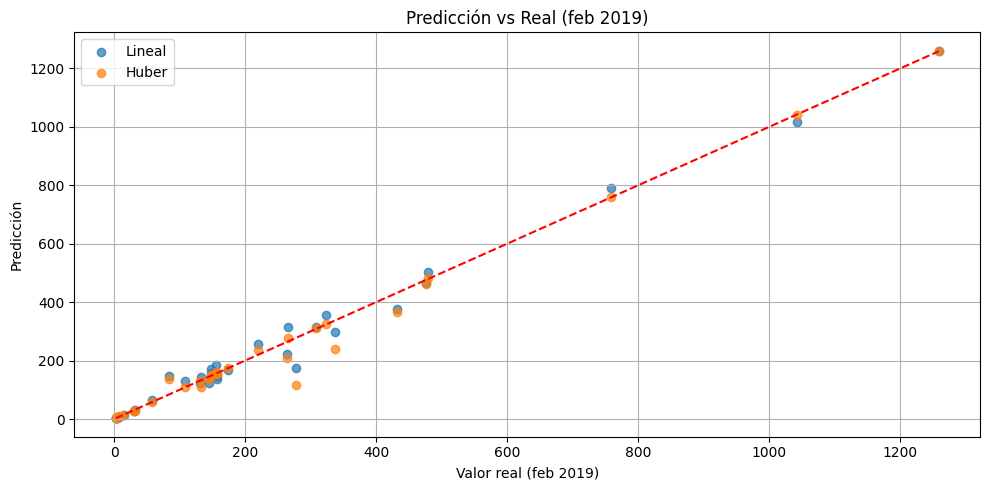

In [21]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, HuberRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 1. Cargar dataset principal
df = pd.read_csv("sell-in.txt", sep="\t")
df = df.groupby(by=["periodo", "product_id"]).agg({"tn": "sum"}).reset_index()
df["periodo"] = pd.to_datetime(df["periodo"], format="%Y%m")
df_pivot = df.pivot(index="periodo", columns="product_id", values="tn").reset_index()

# 2. Lista de productos mágicos
magicos = [
    "periodo", 20002, 20003, 20006, 20010, 20011, 20018, 20019, 20021,
    20026, 20028, 20035, 20039, 20042, 20044, 20045, 20046, 20049,
    20051, 20052, 20053, 20055, 20008, 20001, 20017, 20086, 20180,
    20193, 20320, 20532, 20612, 20637, 20807, 20838
]

# 3. Features de entrenamiento (enero a diciembre 2018)
fecha_inicio_train = pd.to_datetime("2018-01-01")
fecha_fin_train = pd.to_datetime("2018-12-31")
X_train = df_pivot[df_pivot["periodo"].between(fecha_inicio_train, fecha_fin_train)][magicos]
X_train = X_train.T.iloc[1:]
X_train.columns = [f"t-{11-k}" for k in range(12)]

# 4. Target (febrero 2019)
fecha_target = pd.to_datetime("2019-02-01")
y = df_pivot[df_pivot["periodo"] == fecha_target][magicos].T.iloc[1:]
y.columns = ["target"]

# 5. Normalizar datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# 6. Entrenar modelos
model_lr = LinearRegression()
model_lr.fit(X_train_scaled, y)
pred_lr = model_lr.predict(X_train_scaled)

model_hr = HuberRegressor(max_iter=1000)
model_hr.fit(X_train_scaled, y.values.ravel())
pred_hr = model_hr.predict(X_train_scaled)

# 7. Evaluar contra datos reales de febrero 2019
mae_lr = mean_absolute_error(y, pred_lr)
mae_hr = mean_absolute_error(y, pred_hr)
r2_lr = r2_score(y, pred_lr)
r2_hr = r2_score(y, pred_hr)

print("📊 Evaluación sobre febrero 2019 (entrenado con 2018):")
print(f"Linear Regression → MAE: {mae_lr:.2f} | R²: {r2_lr:.4f}")
print(f"Huber Regression  → MAE: {mae_hr:.2f} | R²: {r2_hr:.4f}")

# 8. Gráfico de predicción vs real
plt.figure(figsize=(10, 5))
plt.scatter(y, pred_lr, label="Lineal", alpha=0.7)
plt.scatter(y, pred_hr, label="Huber", alpha=0.7)
plt.plot([y.min()[0], y.max()[0]], [y.min()[0], y.max()[0]], 'r--')
plt.xlabel("Valor real (feb 2019)")
plt.ylabel("Predicción")
plt.title("Predicción vs Real (feb 2019)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


c:\Users\waldo\miniconda3\envs\dtw_regresion\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.953e+03, tolerance: 2.690e+02
  model = cd_fast.enet_coordinate_descent(


📊 Resultados sobre febrero 2019:

Lineal  → MAE: 22.10 | R²: 0.9895
Ridge   → MAE: 21.96 | R²: 0.9877
Lasso   → MAE: 20.87 | R²: 0.9890
Huber   → MAE: 15.70 | R²: 0.9823
RANSAC  → MAE: 18.03 | R²: 0.9725


C:\Users\waldo\AppData\Local\Temp\ipykernel_1456\2475237649.py:79: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  axs[i].plot([y.min()[0], y.max()[0]], [y.min()[0], y.max()[0]], 'r--')
C:\Users\waldo\AppData\Local\Temp\ipykernel_1456\2475237649.py:79: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  axs[i].plot([y.min()[0], y.max()[0]], [y.min()[0], y.max()[0]], 'r--')
C:\Users\waldo\AppData\Local\Temp\ipykernel_1456\2475237649.py:79: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To acces

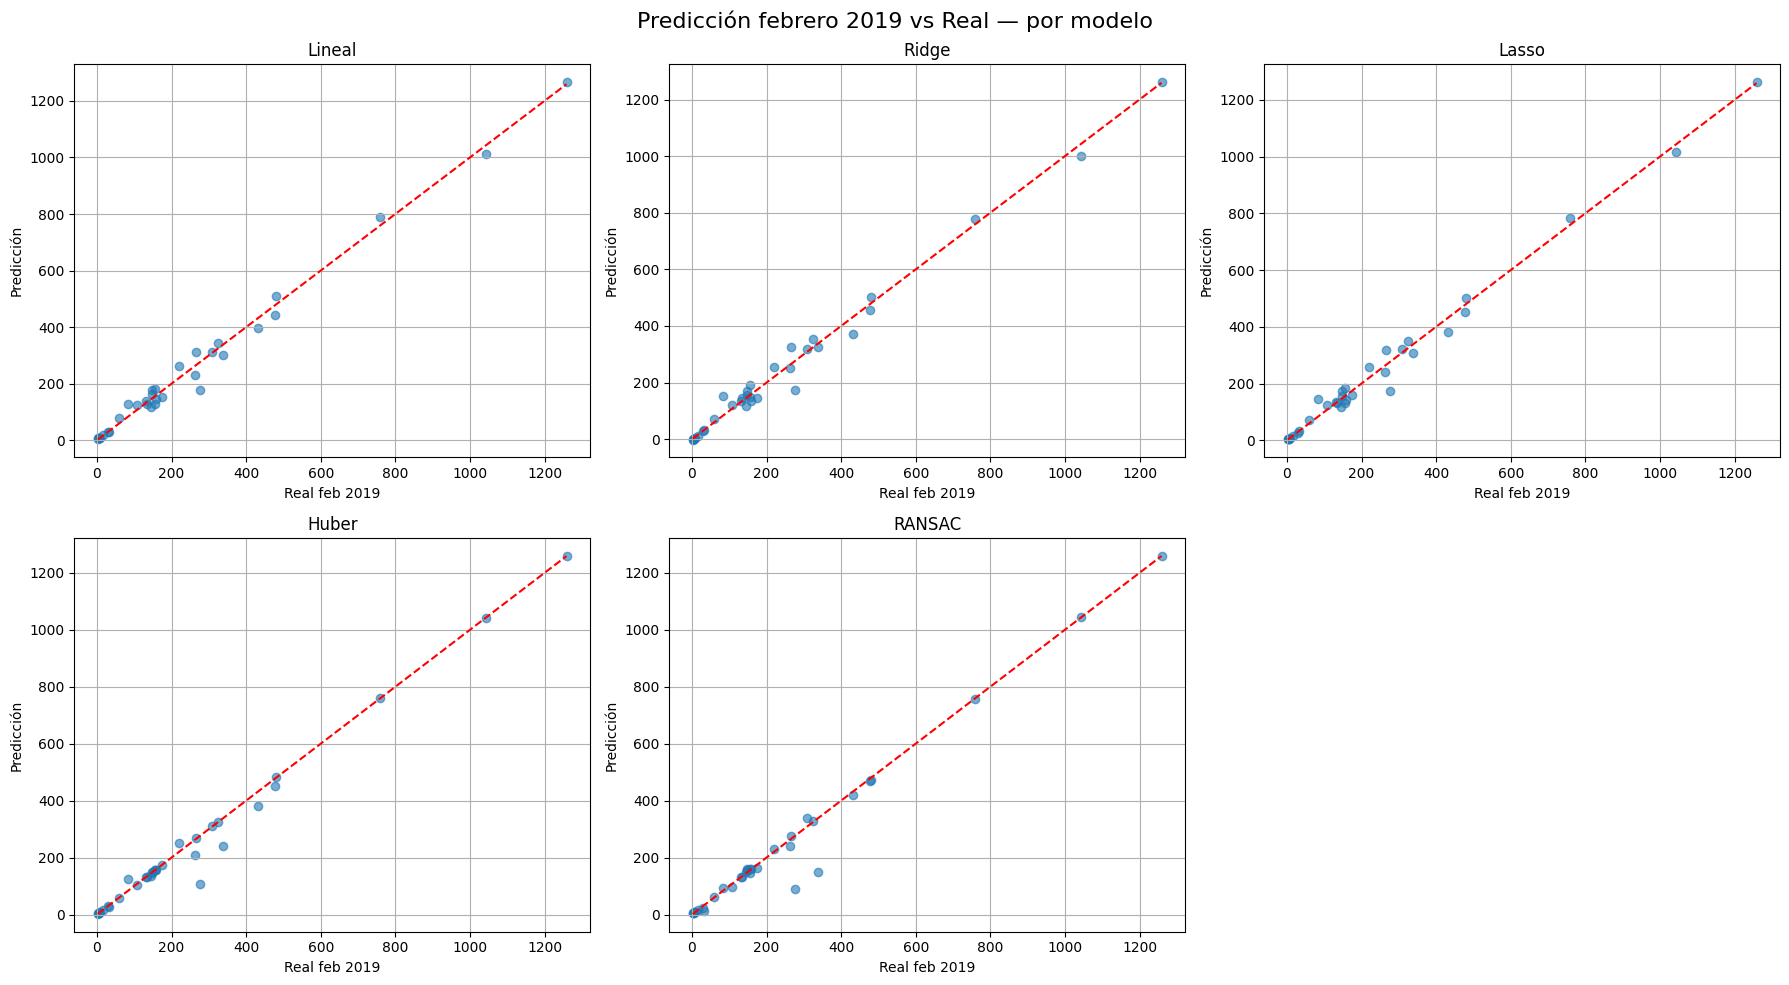

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso, HuberRegressor, RANSACRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

# 1. Cargar dataset
df = pd.read_csv("sell-in.txt", sep="\t")
df = df.groupby(by=["periodo", "product_id"]).agg({"tn": "sum"}).reset_index()
df["periodo"] = pd.to_datetime(df["periodo"], format="%Y%m")
df_pivot = df.pivot(index="periodo", columns="product_id", values="tn").reset_index()

# 2. Productos mágicos
magicos = [
    "periodo", 20002, 20003, 20006, 20010, 20011, 20018, 20019, 20021,
    20026, 20028, 20035, 20039, 20042, 20044, 20045, 20046, 20049,
    20051, 20052, 20053, 20055, 20008, 20001, 20017, 20086, 20180,
    20193, 20320, 20532, 20612, 20637, 20807, 20838
]

# 3. Features base (enero a diciembre 2018)
X_train_base = df_pivot[df_pivot["periodo"].between("2018-01-01", "2018-12-31")][magicos]
X_train_base = X_train_base.T.iloc[1:]
X_train_base.columns = [f"t-{11-k}" for k in range(12)]

# 4. Target (febrero 2019)
y = df_pivot[df_pivot["periodo"] == "2019-02-01"][magicos].T.iloc[1:]
y.columns = ["target"]

# 5. Ingeniería de features
X = X_train_base.copy()
X["mean"] = X.mean(axis=1)
X["std"] = X.std(axis=1)
X["min"] = X.min(axis=1)
X["max"] = X.max(axis=1)
X["suma"] = X.sum(axis=1)
X["tendencia"] = X["t-0"] - X["t-11"]  # t-0 es diciembre, t-11 es enero

# 6. Normalizar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 7. Modelos
modelos = {
    "Lineal": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.1),
    "Huber": HuberRegressor(max_iter=1000),
    "RANSAC": RANSACRegressor()
}

resultados = {}

# 8. Entrenamiento y evaluación
for nombre, modelo in modelos.items():
    modelo.fit(X_scaled, y.values.ravel())
    pred = modelo.predict(X_scaled)
    mae = mean_absolute_error(y, pred)
    r2 = r2_score(y, pred)
    resultados[nombre] = {
        "modelo": modelo,
        "pred": pred,
        "MAE": mae,
        "R²": r2
    }

# 9. Mostrar métricas
print("📊 Resultados sobre febrero 2019:\n")
for nombre, res in resultados.items():
    print(f"{nombre:<7} → MAE: {res['MAE']:.2f} | R²: {res['R²']:.4f}")

# 10. Gráficos de dispersión
fig, axs = plt.subplots(2, 3, figsize=(18, 10))
axs = axs.flatten()

for i, (nombre, res) in enumerate(resultados.items()):
    axs[i].scatter(y, res["pred"], alpha=0.6)
    axs[i].plot([y.min()[0], y.max()[0]], [y.min()[0], y.max()[0]], 'r--')
    axs[i].set_title(f"{nombre}")
    axs[i].set_xlabel("Real feb 2019")
    axs[i].set_ylabel("Predicción")
    axs[i].grid(True)

# Si sobra espacio, lo sacamos
if len(resultados) < len(axs):
    for j in range(len(resultados), len(axs)):
        fig.delaxes(axs[j])

plt.suptitle("Predicción febrero 2019 vs Real — por modelo", fontsize=16)
plt.tight_layout()
plt.show()


In [26]:
# 11. Tabla de errores por producto
df_errores = y.copy()
df_errores.columns = ["real"]

# Agregar predicciones y errores
for nombre, res in resultados.items():
    df_errores[f"pred_{nombre}"] = res["pred"]
    df_errores[f"error_{nombre}"] = np.abs(df_errores["real"] - res["pred"])

# Columna con el modelo que tuvo menor error por fila
error_cols = [f"error_{n}" for n in resultados.keys()]
df_errores["mejor_modelo"] = df_errores[error_cols].idxmin(axis=1).str.replace("error_", "")

# Mostrar tabla ordenada por error de Huber (por ejemplo)
print("\n📋 Errores por producto:")
print(df_errores.sort_values("error_Huber").head(10))  # Cambiá por otro si querés ver distinto orden



📋 Errores por producto:
                  real  pred_Lineal error_Lineal   pred_Ridge error_Ridge  \
product_id                                                                  
20044        173.56001   151.923054    21.636956   144.006675   29.553335   
20180         30.57289    28.211177     2.361713    30.307862    0.265028   
20001       1259.09363  1267.746192     8.652562  1262.841767    3.748137   
20051        133.21935   128.058894     5.160456   144.253781   11.034431   
20039        156.62559   126.530004    30.095586   147.320883    9.304707   
20612          4.30324     7.547079     3.243839     0.281910     4.02133   
20035        147.80444   162.342153    14.537713   155.723921    7.919481   
20807          2.36726     6.115847     3.748587    -1.340642    3.707902   
20046        157.39975   144.581530     12.81822   134.877797   22.521953   
20019        323.66178   342.580774    18.918994   354.544432   30.882652   

             pred_Lasso error_Lasso   pred_Huber e

In [31]:
# 11. Armar X_pred con datos de 2019 (enero-diciembre)
X_pred_base = df_pivot[df_pivot["periodo"].between("2019-01-01", "2019-12-31")]
X_pred_base = X_pred_base.T.iloc[1:]
X_pred_base.columns = [f"t-{11-k}" for k in range(12)]
X_pred_base = X_pred_base.dropna()

# 12. Ingeniería de features para predicción
X_pred = X_pred_base.copy()
X_pred["mean"] = X_pred.mean(axis=1)
X_pred["std"] = X_pred.std(axis=1)
X_pred["min"] = X_pred.min(axis=1)
X_pred["max"] = X_pred.max(axis=1)
X_pred["suma"] = X_pred.sum(axis=1)
X_pred["tendencia"] = X_pred["t-0"] - X_pred["t-11"]

# 13. Normalizar con el scaler entrenado
X_pred_scaled = scaler.transform(X_pred)

# 14. Cargar lista oficial de productos a predecir
productos_ok = pd.read_csv("https://storage.googleapis.com/open-courses/austral2025-af91/labo3v/product_id_apredecir201912.txt", sep="\t")

# 15. Calcular promedio anual 2019 por producto
promedio_2019 = df[df["periodo"].between("2019-01-01", "2019-12-31")].groupby("product_id")["tn"].mean()

# 16. Exportar predicciones por modelo asegurando 780 filas
for nombre, res in resultados.items():
    # Predicción para productos con datos completos
    pred = res["modelo"].predict(X_pred_scaled)
    df_pred = pd.DataFrame({
        "product_id": X_pred.index,
        "tn": pred
    })

    # Identificar faltantes
    faltantes = productos_ok[~productos_ok["product_id"].isin(df_pred["product_id"])]["product_id"]
    nuevas_filas = []
    for pid in faltantes:
        tn_val = promedio_2019.get(pid, 0)  # si no hay promedio, se pone 0
        nuevas_filas.append({"product_id": pid, "tn": tn_val})

    # Unir todo y ordenar
    df_pred = pd.concat([df_pred, pd.DataFrame(nuevas_filas)], ignore_index=True)
    df_pred = df_pred[df_pred["product_id"].isin(productos_ok["product_id"])]
    df_pred = df_pred.sort_values("product_id")

    # Validar cantidad y exportar
    assert len(df_pred) == 780, f"{nombre} tiene {len(df_pred)} filas en lugar de 780"
    df_pred.to_csv(f"prediccion_{nombre.lower()}.csv", index=False)
    print(f"✅ Archivo listo: prediccion_{nombre.lower()}.csv (780 filas)")


✅ Archivo listo: prediccion_lineal.csv (780 filas)
✅ Archivo listo: prediccion_ridge.csv (780 filas)
✅ Archivo listo: prediccion_lasso.csv (780 filas)
✅ Archivo listo: prediccion_huber.csv (780 filas)
✅ Archivo listo: prediccion_ransac.csv (780 filas)


📊 Resultados febrero 2019 (sin features extra):

Lineal  → MAE: 21.02 | R²: 0.9883
Ridge   → MAE: 22.73 | R²: 0.9870
Lasso   → MAE: 21.32 | R²: 0.9882
Huber   → MAE: 16.72 | R²: 0.9826
RANSAC  → MAE: 20.14 | R²: 0.9734


C:\Users\waldo\AppData\Local\Temp\ipykernel_1456\2357389378.py:67: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  axs[i].plot([y.min()[0], y.max()[0]], [y.min()[0], y.max()[0]], 'r--')
C:\Users\waldo\AppData\Local\Temp\ipykernel_1456\2357389378.py:67: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  axs[i].plot([y.min()[0], y.max()[0]], [y.min()[0], y.max()[0]], 'r--')
C:\Users\waldo\AppData\Local\Temp\ipykernel_1456\2357389378.py:67: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To acces

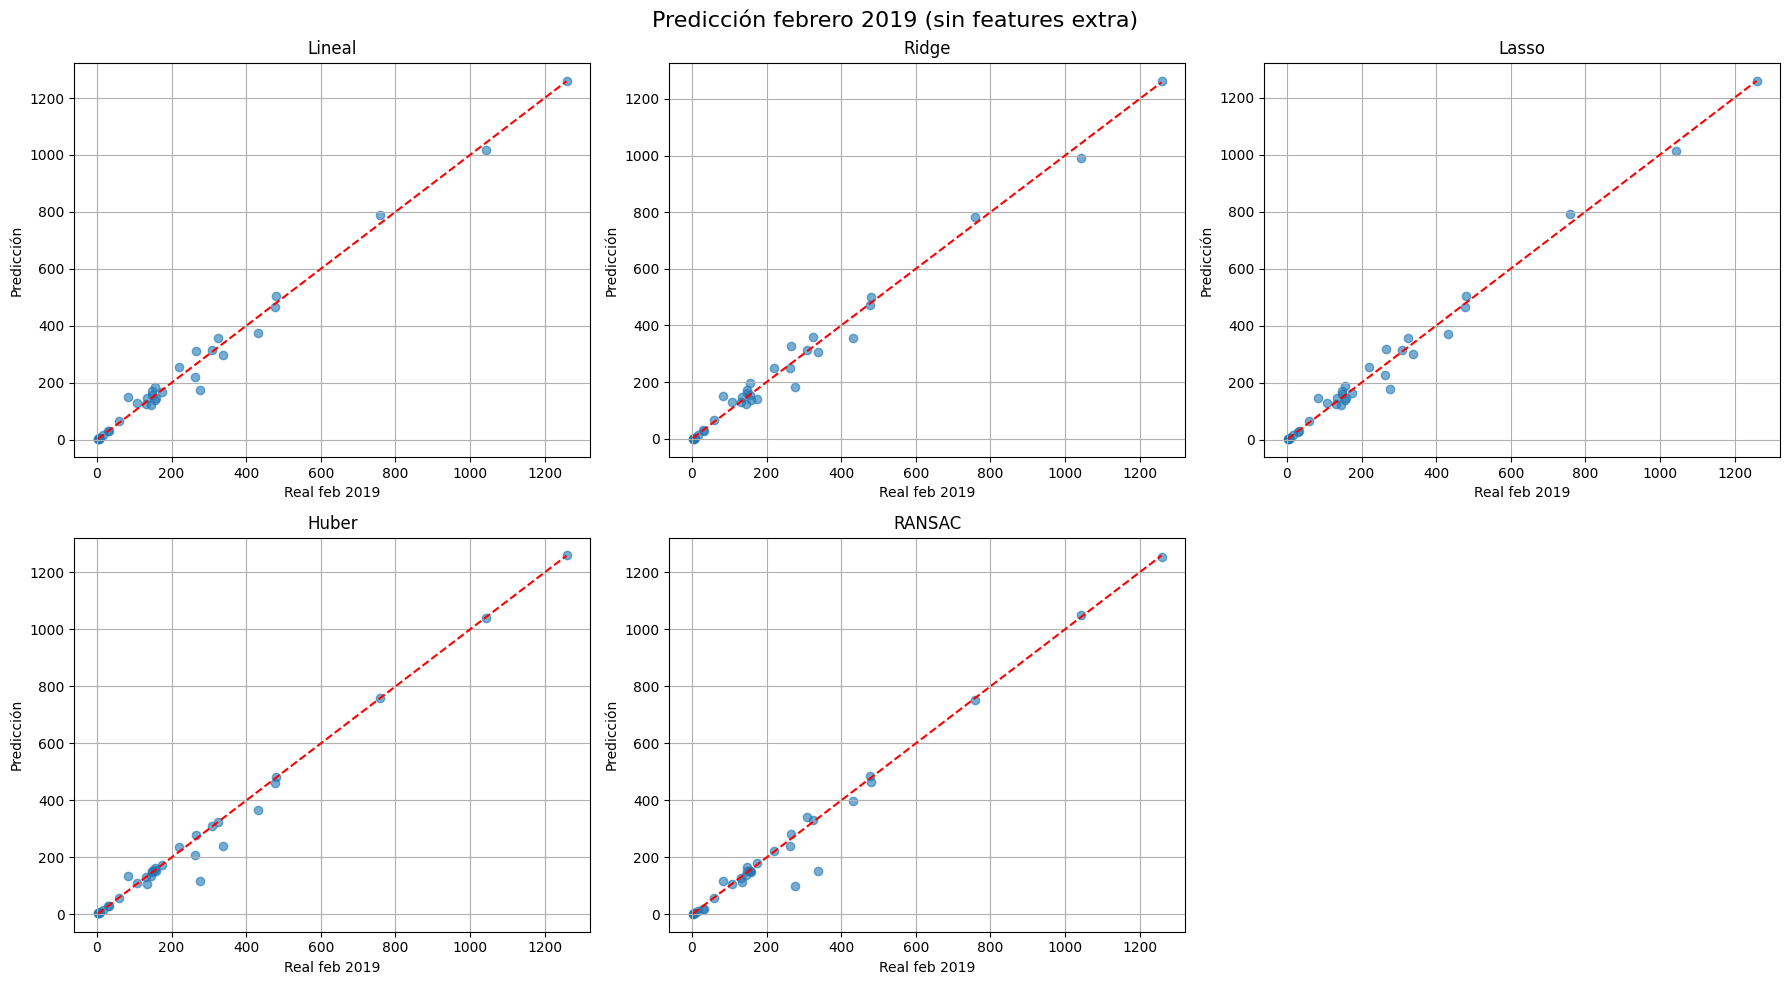

✅ CSV listo: prediccion_lineal_basico.csv
✅ CSV listo: prediccion_ridge_basico.csv
✅ CSV listo: prediccion_lasso_basico.csv
✅ CSV listo: prediccion_huber_basico.csv
✅ CSV listo: prediccion_ransac_basico.csv


In [32]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso, HuberRegressor, RANSACRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 1. Cargar dataset
df = pd.read_csv("sell-in.txt", sep="\t")
df = df.groupby(["periodo", "product_id"]).agg({"tn": "sum"}).reset_index()
df["periodo"] = pd.to_datetime(df["periodo"], format="%Y%m")
df_pivot = df.pivot(index="periodo", columns="product_id", values="tn").reset_index()

# 2. Productos mágicos
magicos = [
    "periodo", 20002, 20003, 20006, 20010, 20011, 20018, 20019, 20021,
    20026, 20028, 20035, 20039, 20042, 20044, 20045, 20046, 20049,
    20051, 20052, 20053, 20055, 20008, 20001, 20017, 20086, 20180,
    20193, 20320, 20532, 20612, 20637, 20807, 20838
]

# 3. Construir X_train
X_train = df_pivot[df_pivot["periodo"].between("2018-01-01", "2018-12-31")][magicos]
X_train = X_train.T.iloc[1:]
X_train.columns = [f"t-{11-k}" for k in range(12)]

# 4. Target (febrero 2019)
y = df_pivot[df_pivot["periodo"] == "2019-02-01"][magicos].T.iloc[1:]
y.columns = ["target"]

# 5. Normalizar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

# 6. Modelos
modelos = {
    "Lineal": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.1),
    "Huber": HuberRegressor(max_iter=1000),
    "RANSAC": RANSACRegressor()
}

resultados = {}

# 7. Entrenar y evaluar (feb 2019)
for nombre, modelo in modelos.items():
    modelo.fit(X_scaled, y.values.ravel())
    pred = modelo.predict(X_scaled)
    resultados[nombre] = {
        "modelo": modelo,
        "pred": pred,
        "MAE": mean_absolute_error(y, pred),
        "R²": r2_score(y, pred)
    }

# 8. Métricas
print("📊 Resultados febrero 2019 (sin features extra):\n")
for nombre, r in resultados.items():
    print(f"{nombre:<7} → MAE: {r['MAE']:.2f} | R²: {r['R²']:.4f}")

# 9. Gráficos
fig, axs = plt.subplots(2, 3, figsize=(18, 10))
axs = axs.flatten()
for i, (nombre, r) in enumerate(resultados.items()):
    axs[i].scatter(y, r["pred"], alpha=0.6)
    axs[i].plot([y.min()[0], y.max()[0]], [y.min()[0], y.max()[0]], 'r--')
    axs[i].set_title(f"{nombre}")
    axs[i].set_xlabel("Real feb 2019")
    axs[i].set_ylabel("Predicción")
    axs[i].grid(True)
for j in range(len(resultados), len(axs)):
    fig.delaxes(axs[j])
plt.suptitle("Predicción febrero 2019 (sin features extra)", fontsize=16)
plt.tight_layout()
plt.show()

# 10. Generar predicción para febrero 2020
X_pred = df_pivot[df_pivot["periodo"].between("2019-01-01", "2019-12-31")]
X_pred = X_pred.T.iloc[1:]
X_pred.columns = [f"t-{11-k}" for k in range(12)]
X_pred = X_pred.dropna()
X_pred_scaled = scaler.transform(X_pred)

# 11. Lista oficial de productos
productos_ok = pd.read_csv("https://storage.googleapis.com/open-courses/austral2025-af91/labo3v/product_id_apredecir201912.txt", sep="\t")

# 12. Promedios 2019 para cubrir faltantes
promedio_2019 = df[df["periodo"].between("2019-01-01", "2019-12-31")].groupby("product_id")["tn"].mean()

# 13. Exportar predicciones con 780 filas
for nombre, res in resultados.items():
    pred = res["modelo"].predict(X_pred_scaled)
    df_pred = pd.DataFrame({"product_id": X_pred.index, "tn": pred})

    faltantes = productos_ok[~productos_ok["product_id"].isin(df_pred["product_id"])]["product_id"]
    nuevas_filas = [{"product_id": pid, "tn": promedio_2019.get(pid, 0)} for pid in faltantes]

    df_pred = pd.concat([df_pred, pd.DataFrame(nuevas_filas)], ignore_index=True)
    df_pred = df_pred[df_pred["product_id"].isin(productos_ok["product_id"])]
    df_pred = df_pred.sort_values("product_id")

    assert len(df_pred) == 780, f"{nombre} tiene {len(df_pred)} filas"
    df_pred.to_csv(f"prediccion_{nombre.lower()}_basico.csv", index=False)
    print(f"✅ CSV listo: prediccion_{nombre.lower()}_basico.csv")
